In [9]:
# import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio

In [10]:
# import data from computer
path: str = './data/' #folder where files are stored
species: pd.DataFrame = pd.read_csv(os.path.join(path, "cross-species.csv"), dtype=str)   # imports file from the folder as species, based on name
identifiers: pd.DataFrame = pd.read_csv(os.path.join(path, "identifiers.tsv"), sep='\t', dtype=str) # imports 3rd file from the folder, based on name

#import fasta file with biopython (Bio)
from Bio import SeqIO
fasta_id = []
fasta_seq = []
with open(os.path.join(path, "identifiers.fasta"), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"): 
        fasta_id.append(record.id) 
        fasta_seq.append(str(record.seq))
# Create df prot_seq which includes proper ID and sequences
fasta_id_df = pd.DataFrame([item.split('|') for item in fasta_id], columns=['0', 'From','ID']) # creates a df by splitting fasta_id list into 3 columns
fasta_id_EntryName:list = fasta_id_df['ID'] # creates a list with the Entry Names from the split df
prot_seq = pd.DataFrame(list(zip(fasta_id_EntryName, fasta_seq)), columns = ["ID", "Sequence"]) # creates a df by combining the Entry Names and the Sequences

# merge dataframes based on Entry Name (df.identifiers) andID (df.prot_seq), if they are similar add the sequence to identifiers, if not add NaN
identifiers_seq = identifiers.merge(prot_seq, how='left', left_on='Entry Name', right_on='ID')[identifiers.columns.tolist() + ['Sequence']] # merges identifiers and prot_seq on Entry Name and ID
identifiers_seq.head()




,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Temperature dependence,Sequence
0,C0H3Q1,C0H3Q1,reviewed,YTZI_BACSU,Uncharacterized membrane protein YtzI,ytzI BSU30659,Bacillus subtilis (strain 168),58,NaN,plasma membrane [GO:0005886],NaN,NaN,MLQLLKNGRWNVMTLLITISILIVLAVLLVTIWTTVKAYNVKHTID...
1,C0H3V2,C0H3V2,reviewed,PTMA_BACSU,Mannitol-specific phosphotransferase enzyme II...,mtlF BSU03982 BSU03980,Bacillus subtilis (strain 168),143,phosphoenolpyruvate-dependent sugar phosphotra...,cytoplasm [GO:0005737]; plasma membrane [GO:00...,kinase activity [GO:0016301]; protein-phosphoc...,NaN,MQVLAKENIKLNQTVSSKEEAIKLAGQTLIDNGYVTEDYISKMFER...
2,C0H3V8,C0H3V8,reviewed,YYZM_BACSU,Uncharacterized protein YyzM,yyzM BSU40939,Bacillus subtilis (strain 168),68,NaN,NaN,NaN,NaN,MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVM...
3,C0H3Y1,C0H3Y1,reviewed,YHZD_BACSU,Uncharacterized protein YhzD,yhzD BSU09889,Bacillus subtilis (strain 168),61,NaN,NaN,NaN,NaN,MADYFLTVFDPSGNTLVNEQFEAEHEEAAKTHGEALLKEKELHSHT...
4,C0H3Z2,C0H3Z2,reviewed,YJZH_BACSU,Uncharacterized protein YjzH,yjzH BSU12069,Bacillus subtilis (strain 168),64,NaN,NaN,NaN,NaN,MKEYEFVRVELSTMRRRPKEDYQQIIHDYAKRGWRFVQIFAPSIDG...


In [11]:
identifiers_seq[['Gene Names1', 'Gene Names2']] = identifiers_seq['Gene Names'].str.split(expand = True, n=1) # splits the Gene Names column into 2 columns

species_seq = pd.merge(left = species, right = identifiers_seq, how='outer', left_on='gene_name', right_on='Gene Names1') # merges species and identifiers_seq on gene_name and Gene Names1
species_seq.head()


,run_name,Protein_ID,gene_name,meltPoint,channel,fold_change,temperature,From,Entry,Reviewed,...,Gene Names,Organism,Length,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Temperature dependence,Sequence,Gene Names1,Gene Names2
0,Mus musculus BMDC lysate,Q8R3W2_0610009B22Rik,0610009B22Rik,50.2158436707956,TMT126,0.995663661957651,37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mus musculus BMDC lysate,Q8R3W2_0610009B22Rik,0610009B22Rik,50.2158436707956,TMT127H,0.81605864351497,43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mus musculus BMDC lysate,Q8R3W2_0610009B22Rik,0610009B22Rik,50.2158436707956,TMT127L,1.12772328075262,39.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mus musculus BMDC lysate,Q8R3W2_0610009B22Rik,0610009B22Rik,50.2158436707956,TMT128H,0.711166252734416,50.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mus musculus BMDC lysate,Q8R3W2_0610009B22Rik,0610009B22Rik,50.2158436707956,TMT128L,0.548872267350788,46.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
species_seq.dropna(subset = ['Sequence'], inplace=True) # drops rows with NaN in the Sequence column
species_seq.drop(columns = ['Gene Names1', 'Gene Names2'], inplace=True) # drops Gene Names1 and Gene Names2 columns
species_seq.head()


,run_name,Protein_ID,gene_name,meltPoint,channel,fold_change,temperature,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Temperature dependence,Sequence
10,Mus musculus BMDC lysate,D3Z687_0610010K14Rik,0610010K14Rik,50.172961468269,TMT126,0.98085043063751,37,D3Z687,D3Z687,unreviewed,D3Z687_MOUSE,RIKEN cDNA 0610010K14 gene,0610010K14Rik,Mus musculus (Mouse),191,NaN,cytosol [GO:0005829]; MLL1 complex [GO:0071339...,identical protein binding [GO:0042802],NaN,MTSASTKVGEIFSAAGAAFTKLGELTMQLHPVSDSSPAGAKWTETE...
11,Mus musculus BMDC lysate,D3Z687_0610010K14Rik,0610010K14Rik,51.6429483794604,TMT126,0.995663661957651,37,D3Z687,D3Z687,unreviewed,D3Z687_MOUSE,RIKEN cDNA 0610010K14 gene,0610010K14Rik,Mus musculus (Mouse),191,NaN,cytosol [GO:0005829]; MLL1 complex [GO:0071339...,identical protein binding [GO:0042802],NaN,MTSASTKVGEIFSAAGAAFTKLGELTMQLHPVSDSSPAGAKWTETE...
12,Mus musculus BMDC lysate,D3Z687_0610010K14Rik,0610010K14Rik,50.172961468269,TMT127H,0.982317808390548,43,D3Z687,D3Z687,unreviewed,D3Z687_MOUSE,RIKEN cDNA 0610010K14 gene,0610010K14Rik,Mus musculus (Mouse),191,NaN,cytosol [GO:0005829]; MLL1 complex [GO:0071339...,identical protein binding [GO:0042802],NaN,MTSASTKVGEIFSAAGAAFTKLGELTMQLHPVSDSSPAGAKWTETE...
13,Mus musculus BMDC lysate,D3Z687_0610010K14Rik,0610010K14Rik,51.6429483794604,TMT127H,0.896666878814239,43,D3Z687,D3Z687,unreviewed,D3Z687_MOUSE,RIKEN cDNA 0610010K14 gene,0610010K14Rik,Mus musculus (Mouse),191,NaN,cytosol [GO:0005829]; MLL1 complex [GO:0071339...,identical protein binding [GO:0042802],NaN,MTSASTKVGEIFSAAGAAFTKLGELTMQLHPVSDSSPAGAKWTETE...
14,Mus musculus BMDC lysate,D3Z687_0610010K14Rik,0610010K14Rik,50.172961468269,TMT127L,1.09554548135896,39.9,D3Z687,D3Z687,unreviewed,D3Z687_MOUSE,RIKEN cDNA 0610010K14 gene,0610010K14Rik,Mus musculus (Mouse),191,NaN,cytosol [GO:0005829]; MLL1 complex [GO:0071339...,identical protein binding [GO:0042802],NaN,MTSASTKVGEIFSAAGAAFTKLGELTMQLHPVSDSSPAGAKWTETE...


In [16]:
# Get a list of unique entries in the 'run_name' column
#print(species['run_name'].unique())

# Based on uniqe run names all entries split into eukaryotes and prokaryotes (manually)
eukaryotes = ('Saccharomyces cerevisiae lysate', 'Arabidopsis thaliana seedling lysate',
 'Mus musculus liver lysate', 'Drosophila melanogaster SII lysate',
 'Caenorhabditis elegans lysate', 'Danio rerio Zenodo lysate',
 'Mus musculus BMDC lysate', 'Oleispira antarctica_RB-8_lysate_R1',
 'Homo sapiens Jurkat cells', 'Homo sapiens K562 cells')
prokaryotes:list = ['Bacillus subtilis_168_lysate_R1', 'Escherichia coli lysate',
 'Geobacillus stearothermophilus NCA26 lysate',
 'Thermus thermophilus HB27 lysate', 'Thermus thermophilus HB27 cells',
 'Escherichia coli cells', 'Picrophilus torridus DSM9790 lysate']

#creates new dataframes that only contain prokaryotes or eukaryotes based
species_eukaryotes = species_seq[species_seq['run_name'].isin(eukaryotes)]
species_prokaryotes = species_seq[species_seq['run_name'].isin(prokaryotes)]
species_prokaryotes.head()





,run_name,Protein_ID,gene_name,meltPoint,channel,fold_change,temperature,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Temperature dependence,Sequence
600642,Thermus thermophilus HB27 lysate,Q9RA48_ORF,ORF,NaN,TMT126,1,70,Q9RA48,Q9RA48,unreviewed,Q9RA48_THETH,Isochorismatase (ORF protein),ORF TthHB5018_00480,Thermus thermophilus,196,NaN,NaN,hydrolase activity [GO:0016787],NaN,MVQVPEIPKVETVELPAKETALIVVDMQNDFAHPKGALFVPDAPQS...
600643,Thermus thermophilus HB27 cells,Q9RA48_ORF,ORF,NaN,TMT126,0.999895788279692,70,Q9RA48,Q9RA48,unreviewed,Q9RA48_THETH,Isochorismatase (ORF protein),ORF TthHB5018_00480,Thermus thermophilus,196,NaN,NaN,hydrolase activity [GO:0016787],NaN,MVQVPEIPKVETVELPAKETALIVVDMQNDFAHPKGALFVPDAPQS...
600644,Thermus thermophilus HB27 lysate,Q9RA48_ORF,ORF,NaN,TMT127H,0.918377486274352,75.5,Q9RA48,Q9RA48,unreviewed,Q9RA48_THETH,Isochorismatase (ORF protein),ORF TthHB5018_00480,Thermus thermophilus,196,NaN,NaN,hydrolase activity [GO:0016787],NaN,MVQVPEIPKVETVELPAKETALIVVDMQNDFAHPKGALFVPDAPQS...
600645,Thermus thermophilus HB27 cells,Q9RA48_ORF,ORF,NaN,TMT127H,0.695804974964807,75.5,Q9RA48,Q9RA48,unreviewed,Q9RA48_THETH,Isochorismatase (ORF protein),ORF TthHB5018_00480,Thermus thermophilus,196,NaN,NaN,hydrolase activity [GO:0016787],NaN,MVQVPEIPKVETVELPAKETALIVVDMQNDFAHPKGALFVPDAPQS...
600646,Thermus thermophilus HB27 lysate,Q9RA48_ORF,ORF,NaN,TMT127L,0.867960394769711,72.6,Q9RA48,Q9RA48,unreviewed,Q9RA48_THETH,Isochorismatase (ORF protein),ORF TthHB5018_00480,Thermus thermophilus,196,NaN,NaN,hydrolase activity [GO:0016787],NaN,MVQVPEIPKVETVELPAKETALIVVDMQNDFAHPKGALFVPDAPQS...


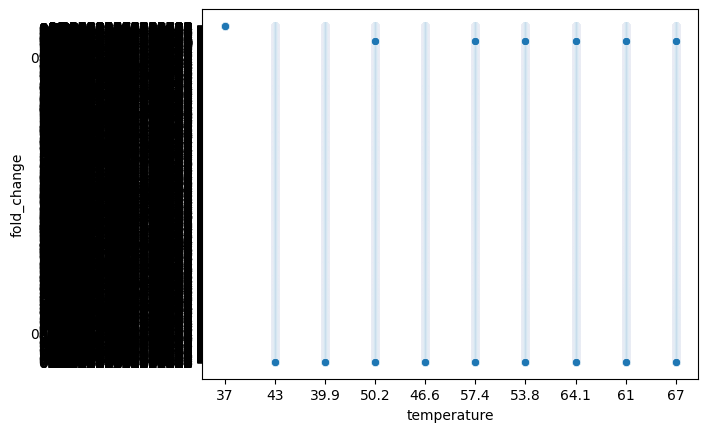

In [17]:
species_Ecoli_cells = species_prokaryotes[species_prokaryotes['run_name'].isin(['Escherichia coli cells'])]
species_Ecoli_cells.head()

sns.scatterplot(data=species_Ecoli_cells, x='temperature', y='fold_change')
plt.show()

In [20]:

## aminoacid composition
AA_hydrophobic:list = ['A', 'V', 'I', 'L', 'M', 'F', 'T', 'Y', 'W', ]
AA_polar_neutral:list = ['N', 'C', 'Q', 'S', 'T']
AA_acidic:list = ['D', 'E']
AA_basic:list = ['R', 'H', 'K']


AttributeError: 'DataFrame' object has no attribute 'summary'